In [1]:
import pandas as pd
import numpy as np
from parametros import *
import sys, os
sys.path.append(os.path.join(os.path.dirname(file), "..", ".."))
from prepro_py import preprocesamiento_naive
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.naive_bayes import CategoricalNB
os.chdir("../../../../")

In [2]:
to_csv = False
return_something = True
feature_selection = False
seek_correlation = None
value = "1000"

In [3]:
y_data_style = "h1n1"
x_data, y_data, test = preprocesamiento_naive(
    PAHT_OUTPUT,
    features_keep=features_keep,
    features_drop=features_drop,
    y_data_style=y_data_style,
    features_NA_as_cat=features_NA_as_cat,
    imputation_method=imputation_method,
    n_estimators=n_estimators,
    criterion=criterion,
    feature_selection=feature_selection,
    seek_correlation=seek_correlation,
    to_csv=to_csv,
    return_something=return_something,
    sc_max_depth=sc_max_depth,
    print_cor=print_cor,
    value=value,
    sampling=sampling
    )

C:\Users\Alejandro\anaconda3\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


0        1.0
1        3.0
2        1.0
3        1.0
4        2.0
        ... 
26702    2.0
26703    1.0
26704    2.0
26705    1.0
26706    0.0
Name: h1n1_concern, Length: 26707, dtype: category
Categories (4, float64): [0.0, 1.0, 2.0, 3.0]
0        0.0
1        2.0
2        1.0
3        1.0
4        1.0
        ... 
26702    0.0
26703    2.0
26704    2.0
26705    1.0
26706    0.0
Name: h1n1_knowledge, Length: 26707, dtype: category
Categories (3, float64): [0.0, 1.0, 2.0]
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
26702    0.0
26703    0.0
26704    0.0
26705    0.0
26706    0.0
Name: behavioral_antiviral_meds, Length: 26707, dtype: category
Categories (2, float64): [0.0, 1.0]
0        0.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
26702    1.0
26703    1.0
26704    1.0
26705    0.0
26706    1.0
Name: behavioral_avoidance, Length: 26707, dtype: category
Categories (2, float64): [0.0, 1.0]
0        0.0
1        0.0
2        0.0
3  

In [4]:
x_data.drop("respondent_id", axis=1, inplace=True)

In [5]:
f_selector = SFS(
    CategoricalNB(),
    k_features=x_data.shape[1], 
    forward=True, 
    floating=False, 
    verbose=2,
    scoring='roc_auc',
    cv=5
    )
f_selector.fit(x_data, np.array(y_data).ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   10.8s finished

[2022-01-12 16:59:33] Features: 1/35 -- score: 0.70354378638972[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   10.9s finished

[2022-01-12 16:59:44] Features: 2/35 -- score: 0.7837271067779948[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   11.5s finished

[2022-01-12 16:59:55] Features: 3/35 -- score: 0.8207753760715132[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

SequentialFeatureSelector(estimator=CategoricalNB(), k_features=35,
                          scoring='roc_auc', verbose=2)

In [6]:
values = pd.DataFrame.from_dict(f_selector.get_metric_dict()).T
values

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(16,)","[0.7070970450968546, 0.7019804416595374, 0.704...",0.703544,"(opinion_h1n1_risk,)",0.005673,0.004414,0.002207
2,"(9, 16)","[0.789211812910934, 0.78544255483571, 0.786533...",0.783727,"(doctor_recc_h1n1, opinion_h1n1_risk)",0.010477,0.008152,0.004076
3,"(9, 14, 16)","[0.8310784731551882, 0.8197704895030204, 0.820...",0.820775,"(doctor_recc_h1n1, health_insurance, opinion_h...",0.010134,0.007884,0.003942
4,"(9, 14, 15, 16)","[0.8487116605531582, 0.837692476038991, 0.8448...",0.840443,"(doctor_recc_h1n1, health_insurance, opinion_h...",0.010354,0.008055,0.004028
5,"(9, 14, 15, 16, 33)","[0.8561783434154739, 0.8425636316229821, 0.849...",0.846985,"(doctor_recc_h1n1, health_insurance, opinion_h...",0.010847,0.008439,0.00422
6,"(9, 14, 15, 16, 21, 33)","[0.8563463034652755, 0.8439637524620702, 0.850...",0.847885,"(doctor_recc_h1n1, health_insurance, opinion_h...",0.010563,0.008219,0.004109
7,"(9, 14, 15, 16, 21, 23, 33)","[0.8567133233995365, 0.8439950617232241, 0.850...",0.848295,"(doctor_recc_h1n1, health_insurance, opinion_h...",0.010446,0.008128,0.004064
8,"(2, 9, 14, 15, 16, 21, 23, 33)","[0.856949556487038, 0.8446149641514196, 0.8508...",0.848635,"(behavioral_antiviral_meds, doctor_recc_h1n1, ...",0.01021,0.007944,0.003972
9,"(2, 9, 14, 15, 16, 21, 23, 29, 33)","[0.8566304952203638, 0.8451971698103329, 0.850...",0.848706,"(behavioral_antiviral_meds, doctor_recc_h1n1, ...",0.009862,0.007673,0.003836
10,"(2, 9, 14, 15, 16, 21, 23, 29, 30, 33)","[0.8565764631843926, 0.8451950755453728, 0.850...",0.848678,"(behavioral_antiviral_meds, doctor_recc_h1n1, ...",0.009887,0.007693,0.003846


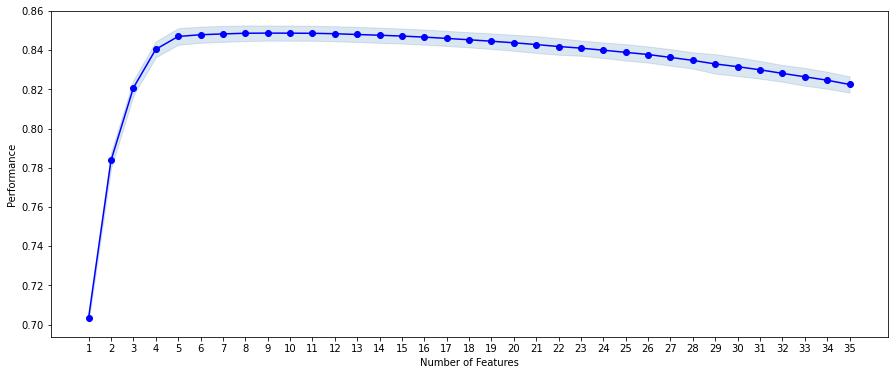

In [7]:
fig = plot_sfs(f_selector.get_metric_dict(), kind='std_err', figsize=(15,6))

In [1]:
x_data.columns.values[[values.feature_idx[9]]]

NameError: name 'x_data' is not defined

In [5]:
x_data.columns.values[[(2, 9, 14, 15, 16, 21, 23, 29, 33)]]


C:\Users\ALEJAN~1\AppData\Local\Temp/ipykernel_8304/1576131245.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x_data.columns.values[[(2, 9, 14, 15, 16, 21, 23, 29, 33)]]


array(['behavioral_antiviral_meds', 'doctor_recc_h1n1',
       'health_insurance', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'age_group', 'race', 'hhs_geo_region',
       'employment_industry'], dtype=object)